In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from selenium import webdriver
import time
import webscraping

### Let's take a look at the top teams in the English Premier League (EPL)

In [2]:
#data cleaning
df = pd.read_csv("premTopGoals.csv")
df = df.head(n=6)
df = df.drop(columns=['Unnamed: 0', 'YC', 'RC', 'F', 'OFF', 'HG', 'KG'])
df.rename(columns={'STANDARD':'Name', 'GP': 'Games', 'GF':'Goals', 'A':'Assists', 'SOG':'Shots on Goal', 'S':'Total Shots'}, inplace=True)
for i in range(6):
    if(df.at[i, 'Name'].split()[1] == df.at[i, 'Name'].split()[2]):
        df.at[i, 'Name'] = df.at[i, 'Name'].split()[1]
    else:
        df.at[i, 'Name'] = df.at[i, 'Name'].split()[1] + df.at[i, 'Name'].split()[2]
    df.at[i, 'Goals/Game'] = (df.at[i, 'Goals']/df.at[i, 'Games'])
print(df)

               Name  Games  Goals  Assists  Shots on Goal  Total Shots  \
0    ManchesterCity     38     95       70            261          689   
1         Liverpool     38     89       53            231          576   
2           Arsenal     38     73       51            176          473   
3  TottenhamHotspur     38     67       45            198          536   
4  ManchesterUnited     38     65       38            225          532   
5           Chelsea     38     63       51            201          601   

   Goals/Game  
0    2.500000  
1    2.342105  
2    1.921053  
3    1.763158  
4    1.710526  
5    1.657895  


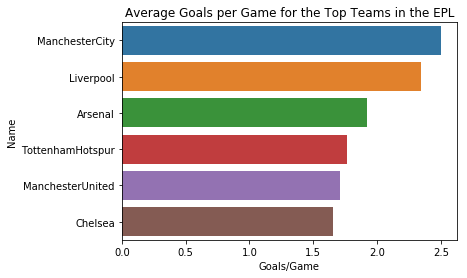

In [3]:
#visualization of top scorers per game
#df1 = df.sort_values(['Goals/Game'])
bar1 = sns.barplot(x='Goals/Game', y='Name', data=df)
#bar1.set_xticklabels(bar1.get_xticklabels(),rotation=90)
plt.title('Average Goals per Game for the Top Teams in the EPL')
plt.show()

In [4]:
#create 2 new columns for shooting accuracy and coversion rate
#shooting accuracy is given by (shots on goal/total shots)*100%
#conversion rate is given by (goals/shots on goal)*100%
for i in range(6):
    df.at[i, 'Shooting Accuracy(%)'] = (df.at[i, 'Shots on Goal']/df.at[i, 'Total Shots'])*100
    df.at[i, 'Conversion Rate(%)'] = (df.at[i, 'Goals']/df.at[i, 'Shots on Goal'])*100
print(df)

               Name  Games  Goals  Assists  Shots on Goal  Total Shots  \
0    ManchesterCity     38     95       70            261          689   
1         Liverpool     38     89       53            231          576   
2           Arsenal     38     73       51            176          473   
3  TottenhamHotspur     38     67       45            198          536   
4  ManchesterUnited     38     65       38            225          532   
5           Chelsea     38     63       51            201          601   

   Goals/Game  Shooting Accuracy(%)  Conversion Rate(%)  
0    2.500000             37.880987           36.398467  
1    2.342105             40.104167           38.528139  
2    1.921053             37.209302           41.477273  
3    1.763158             36.940299           33.838384  
4    1.710526             42.293233           28.888889  
5    1.657895             33.444260           31.343284  


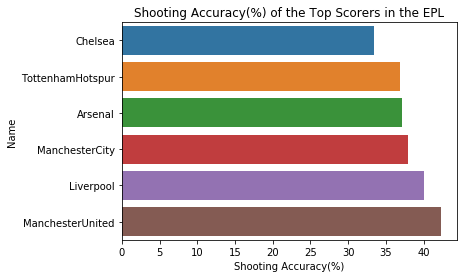

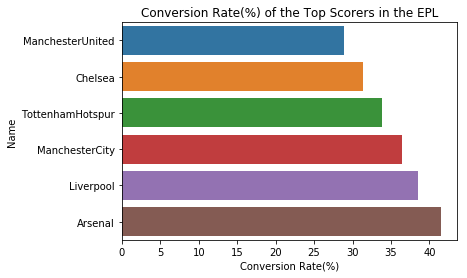

In [5]:
#visualization of top scorers' shooting accuracy and conversion rate
df2 = df.sort_values(['Shooting Accuracy(%)'])
bar2 = sns.barplot(x='Shooting Accuracy(%)', y='Name', data=df2)
plt.title('Shooting Accuracy(%) of the Top Scorers in the EPL')
plt.show()

df3 = df.sort_values(['Conversion Rate(%)'])
bar3 = sns.barplot(x='Conversion Rate(%)', y='Name', data=df3)
plt.title('Conversion Rate(%) of the Top Scorers in the EPL')
plt.show()